<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# ASSIGNMENT
# DECISION TREES AND RANDOM FOREST

Exploring publicly available data from __LendingClub.com__. Lending Club connects people who need money __(borrowers)__ with people who have money __(investors)__.I am trying to create a model that will help predict people who have a profile of having a __high probability of paying back__.

Lending club had a very interesting year in __2016__. This data is from _before they even went public_.

I'm using lending data from __2007-2010__ and trying to classify and predict whether or not the borrower paid back their loan in full. The data is downloaded from here

Here are what the columns represent:
- __credit.policy:__ 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- __purpose:__ The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- __int.rate:__ The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- __installment:__ The monthly installments owed by the borrower if the loan is funded.
- __log.annual.inc:__ The natural log of the self-reported annual income of the borrower.
- __dti:__ The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- __fico:__ The FICO credit score of the borrower.
- __days.with.cr.line:__ The number of days the borrower has had a credit line.
- __revol.bal:__ The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- __revol.util:__ The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- __inq.last.6mths:__ The borrower's number of inquiries by creditors in the last 6 months.
- __delinq.2yrs:__ The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- __pub.rec:__ The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

### Load the data

In [1]:
import pandas as pd
loans = pd.read_csv('F:/INSAID/GCD/Course Content/workspace/loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Check the columns present in dataset

In [2]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

### Check the shape of dataset

In [3]:
loans.shape

(9578, 14)

### Check the descriptive statistics of dataset

In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### Check the info of the dataset

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Q 1. Write a code to check if there is any missing values present in the dataset.

In [6]:
def tree():
    return loans.isnull().sum()
tree()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### Data Visualisation

### Q 2. Plot a histogram of two FICO distribution on top of each other, one for each credit.policy

In [7]:
import matplotlib.pyplot as plt
def tree():
    plt.figure(figsize=(10,6))
    loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
    loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
    plt.legend()
    plt.xlabel('FICO')
tree()

### Q 3. Plot a histogram of two FICO distribution on top of each other, one for each not.fully.paid

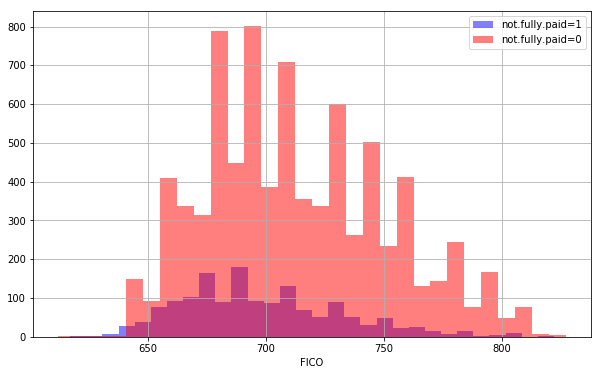

In [8]:
import matplotlib.pyplot as plt
def tree():
    plt.figure(figsize=(10,6))
    loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
    loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
    plt.legend()
    plt.xlabel('FICO')
tree()

### Q 4. Using seaborn countplot show the counts of loans by purpose, with the color hue defined by not.fully.paid

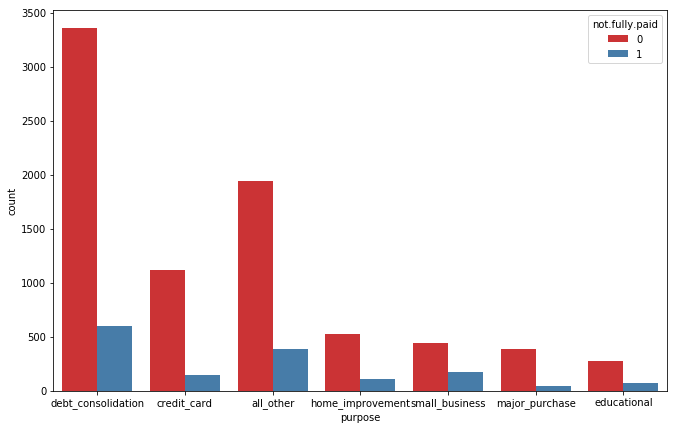

In [9]:
import seaborn as sns
def tree():
    plt.figure(figsize=(11,7))
    sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')
tree()

### Q. 5 Using a seaborn countplot understand the trend between FICO score and interest rate

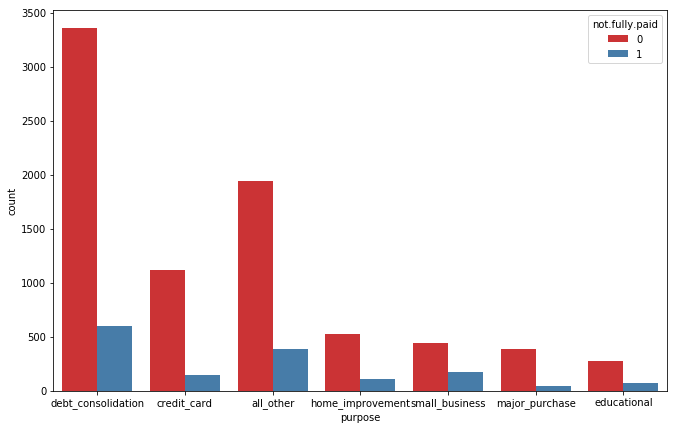

In [10]:
import seaborn as sns
def tree():
    plt.figure(figsize=(11,7))
    sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')
tree()

### Dealing with categorical variables.
``` ['purpose'] ```
- The purpose column is categorical. so transform them using dummy variables using pd.get_dummies.

In [11]:
cat_feats = ['purpose']

### Q 6. Using pd.get_dummies create a fixed larger dataframe that has new feature columns with dummy variables.

In [12]:
final_data = pd.DataFrame()
def tree():
    final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)
    return final_data
final_data = tree()

### Q 7. Extract the independent column to prepare X

In [13]:
X = pd.DataFrame()
def tree():
    X = final_data.drop('not.fully.paid',axis=1)
    return X
X = tree()

### Q 8. Extract dependent column into a dataframe y for model prediction

In [14]:
y = pd.DataFrame()
def tree():
    y = final_data.loc[:,final_data.columns == 'not.fully.paid']
    return y
y = tree()

### Q 9. Split X and y into train and test dataset

In [15]:
from sklearn.model_selection import train_test_split
def tree():
    return train_test_split(X, y, test_size=0.30, random_state=101)
X_train, X_test, y_train, y_test = tree()

### Check the shape of X and y of train dataset

In [16]:
def tree():
    print(X_train.shape)
    print(y_train.shape)
tree()

(6704, 18)
(6704, 1)


### Check the shape of X and y of test dataset

In [17]:
def tree():
    print(X_test.shape)
    print(y_test.shape)
tree()

(2874, 18)
(2874, 1)


### Q 10. Instantiate Decision Tree Classifier using scikit learn

In [18]:
from sklearn.tree import DecisionTreeClassifier
def tree():
    dtree = DecisionTreeClassifier()
    return dtree
dtree = tree()

### Q 11. Fit the model on X_train and y_train

In [19]:
def tree():
    return dtree.fit(X_train,y_train)
tree()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Q 12. Using the model for prediciton

In [20]:
predictions = pd.DataFrame()
def tree():
    predictions = dtree.predict(X_test)
    return predictions
predictions = tree()

### Q 13. Model evaluation using Confusion matrix.

In [21]:
from sklearn.metrics import confusion_matrix
def tree():
    print(confusion_matrix(y_test,predictions))
tree()

[[2006  425]
 [ 340  103]]


### Q 14. Model evaluation using recall score

In [22]:
from sklearn.metrics import recall_score
def log():
    recall1 = recall_score(y_test,predictions)
    print('Recall score for test data is:', recall1)
    return recall1
recall1 = log()

Recall score for test data is: 0.2325056433408578


### Q 15. Model evaluation using classification report.
- Please refer the link for Classification report documentation - http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [23]:
from sklearn.metrics import classification_report
def tree():
    print(classification_report(y_test,predictions))
tree()

             precision    recall  f1-score   support

          0       0.86      0.83      0.84      2431
          1       0.20      0.23      0.21       443

avg / total       0.75      0.73      0.74      2874



### Q 16. Instantiate Decision Tree Classifer using scikit learn having (criterion='entropy', max_leaf_nodes=10, max_depth=3, min_samples_split=5, min_samples_leaf=4).
- Please refer the link for DecisionTreeClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [24]:
def tree():
    dtree1 = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=10, max_depth=3, min_samples_split=5, min_samples_leaf=4)
    return dtree1
dtree1 = tree()

### 16.1 Fit the model X_train and y_train

In [25]:
def tree():
    return dtree1.fit(X_train,y_train)
tree()

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 16.2 Use the model for prediction

In [26]:
predictions_new = pd.DataFrame()
def tree():
    predictions_new = dtree1.predict(X_test)
    return predictions_new
predictions_new = tree()

### 16.3 Model evaluation using Confusion matrix

In [27]:
def tree():
    print(confusion_matrix(y_test,predictions_new))
tree()

[[2428    3]
 [ 442    1]]


### 16.4 Model evaluation using recall score

In [28]:
from sklearn.metrics import recall_score
def log():
    recall2 = recall_score(y_test,predictions_new)
    print('Recall score for test data is:', recall2)
    return recall2
recall2 = log()

Recall score for test data is: 0.002257336343115124


### 16.5 Model evaluation using classification report

In [29]:
def tree():
    print(classification_report(y_test,predictions_new))
tree()

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.25      0.00      0.00       443

avg / total       0.75      0.85      0.78      2874



### Q 17. Write a code to find the difference between the recall score of 2 Decision Tree models created above (Give the absolute value).

In [30]:
def log():
    difference = recall1 - recall2
    return difference
log()

0.23024830699774268

## Random Forest Model

### Q 18. Instantiate Random Forest Classifier using scikit learn having n_estimators = 600.

In [31]:
from sklearn.ensemble import RandomForestClassifier
def rf():
    rfc = RandomForestClassifier(n_estimators=600)
    return rfc
rfc = rf()

### Q 19. Fit the model on X_train and y_train

In [32]:
def rf():
    return rfc.fit(X_train,y_train)
rf()

F:\python\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Q 20. Using the model for prediction

In [33]:
predictions1 = pd.DataFrame()
def rf():
    predictions1 = rfc.predict(X_test)
    return predictions1
predictions1 = rf()

### Q 21. Model evaluation using Confusion matrix 

In [34]:
def rf():
    print(confusion_matrix(y_test,predictions1))
rf()

[[2425    6]
 [ 434    9]]


### Q 22. Model evaluation using recall score

In [35]:
from sklearn.metrics import recall_score
def log():
    recall_rfc = recall_score(y_test,predictions1)
    print('Recall score for test data is:', recall_rfc)
    return recall_rfc
recall_rfc = log()

Recall score for test data is: 0.020316027088036117


### Q 23. Model evaluation using Classification report.

In [36]:
def rf():
    print(classification_report(y_test,predictions1))
rf()

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.60      0.02      0.04       443

avg / total       0.81      0.85      0.78      2874



### Q 24. Instantitate Random Forest Model using scikit learn having (criterion='entropy',n_estimators = 100, random_state = 0, max_depth = 2, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=5).
- Pleae refer the link for RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [37]:
def rf():
    rfc_new = RandomForestClassifier(criterion='entropy',n_estimators = 100, random_state = 0, max_depth = 2, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=5)
    return rfc_new
rfc_new = rf()

### 24.1 Fit the model on X_train and y_train

In [38]:
def rf():
    return rfc_new.fit(X_train,y_train)
rf()

F:\python\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='auto', max_leaf_nodes=5,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### 24.2 Using the model for prediction

In [39]:
new_predictions = pd.DataFrame()
def rf():
    new_predictions = rfc_new.predict(X_test)
    return new_predictions
new_predictions = rf()

### 24.3 Model evaluation using Confusion Matrix

In [40]:
def rf():
    print(confusion_matrix(y_test,new_predictions))
rf()

[[2431    0]
 [ 443    0]]


### 24.4 Model evaluation using recall score

In [41]:
from sklearn.metrics import recall_score
def log():
    recall_rfc1 = recall_score(y_test,new_predictions)
    print('Recall score for test data is:', recall_rfc1)
    return recall_rfc1
recall_rfc1 = log()

Recall score for test data is: 0.0


### 24.5 Model evaluation using Classification report

In [42]:
def rf():
    print(classification_report(y_test,new_predictions))
rf()

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.00      0.00      0.00       443

avg / total       0.72      0.85      0.78      2874



F:\python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Q 25. Write a code to understand the difference between the recall score of the above 2 Random Forest models   ( Give the absolute value).

In [43]:
def log():
    difference_rfc = recall_rfc - recall_rfc1
    return difference_rfc
log()

0.020316027088036117

In [44]:
rfc_new.feature_importances_

array([0.23889377, 0.24054004, 0.04599685, 0.01597456, 0.01022382,
       0.14998053, 0.00908084, 0.02726657, 0.06869162, 0.1364884 ,
       0.        , 0.00702336, 0.00432773, 0.        , 0.00040923,
       0.0008174 , 0.        , 0.04428528])